In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d mohansacharya/graduate-admissions

Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 18.0MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/graduate-admissions.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [8]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.shape

(500, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns=['Serial No.'],inplace=True)

In [13]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [16]:
Y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [18]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
280,311,102,3,4.5,4.0,8.64,1
190,324,111,5,4.5,4.0,9.16,1
103,317,104,2,4.5,4.0,8.47,0
201,315,110,2,3.5,3.0,8.46,1
402,324,109,3,3.5,3.0,8.94,1
...,...,...,...,...,...,...,...
440,305,104,2,2.5,1.5,7.79,0
131,303,105,5,5.0,4.5,8.65,0
249,321,111,3,3.5,4.0,8.83,1
152,321,112,5,5.0,5.0,9.06,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [20]:
X_train_scaled

array([[0.42      , 0.35714286, 0.5       , ..., 0.75      , 0.58974359,
        1.        ],
       [0.68      , 0.67857143, 1.        , ..., 0.75      , 0.75641026,
        1.        ],
       [0.54      , 0.42857143, 0.25      , ..., 0.75      , 0.53525641,
        0.        ],
       ...,
       [0.62      , 0.67857143, 0.5       , ..., 0.75      , 0.65064103,
        1.        ],
       [0.62      , 0.71428571, 1.        , ..., 1.        , 0.72435897,
        1.        ],
       [0.96      , 0.82142857, 1.        , ..., 1.        , 0.77884615,
        1.        ]])

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [42]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 7)                 56        
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 176 (704.00 Byte)
Trainable params: 176 (704.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics='accuracy')

In [45]:
history=model.fit(X_train_scaled,Y_train,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 32ms/step - loss: 0.4235 - accuracy: 0.0000e+00 - val_loss: 0.3723 - val_accuracy: 0.0000e+00
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 0.3125 - accuracy: 0.0000e+00 - val_loss: 0.2601 - val_accuracy: 0.0000e+00
Epoch 3/200
10/10 [==============================] - 0s 9ms/step - loss: 0.2064 - accuracy: 0.0000e+00 - val_loss: 0.1546 - val_accuracy: 0.0000e+00
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.1133 - accuracy: 0.0000e+00 - val_loss: 0.0726 - val_accuracy: 0.0000e+00
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0492 - accuracy: 0.0000e+00 - val_loss: 0.0271 - val_accuracy: 0.0000e+00
Epoch 6/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.0000e+00 - 

In [46]:
Y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [47]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.7903062164702556

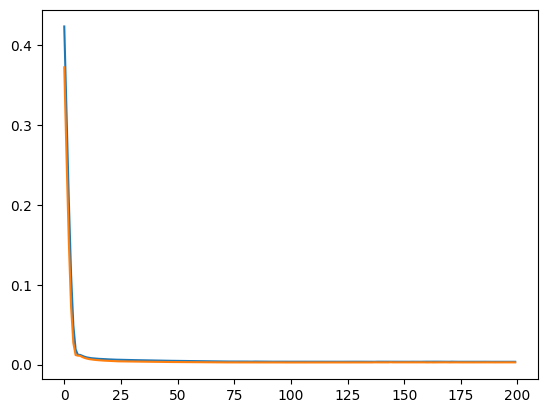

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])